Assignment 1 : Distributions

Following the ipython notebook 
https://github.com/fedhere/PUI2015_fbianco/blob/master/citibikes/citibikes_compare_distributions.ipynb

Test the correlation of the age distribution of Male vs Female riders and of day vs night riders

Use: age of bikers for male and age of bikers for female gender for whichever month, or set of months you choose. 
test the correlation/independence of the 2 samples using: 
Pearson’s test (answer: are the 2 samples correlated?)
Spearman’s test (answer: are the 2 samples correlated?)
K-S test (answer: are the samples likely to come from the same parent distribution?) 
State in words what the tests tell you.

Use: age of bikers during the day and during the night hours for the same sample .
Test the correlation/independence of the 2 samples using the same tests.
State in words what the tests tell you.

Extra credit: code up your own version of the KS test and compare your result with the one obtained from scipy.stats.ks_2sample


In [2]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import scipy.stats
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
#s = json.load(open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )


In [4]:
#df = pd.read_csv(os.getenv('PUI2015')+"/201506-citibike-tripdata.csv",parse_dates=['birth year'])
df = pd.read_csv(os.getenv('PUI2015')+"/201506-citibike-tripdata.csv")

In [6]:
type(df['birth year'][1])


numpy.float64

In [7]:
df['age']=2015-(df['birth year'])

In [52]:
#Age of male
df['ageM']=(df['age'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1 )])
#print (df['ageM'])
df['ageF']=(df['age'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2 )])
#print (df['ageF'])

#print len(df['ageM'])
#print len(df['ageF'])

print  (df['ageM'].describe())
print ""
print  (df['ageF'].describe())


count    621580.000000
mean         39.113612
std          11.483732
min          16.000000
25%          30.000000
50%          37.000000
75%          47.000000
max         130.000000
Name: ageM, dtype: float64

count    188655.000000
mean         37.509560
std          11.221308
min          16.000000
25%          29.000000
50%          34.000000
75%          46.000000
max         114.000000
Name: ageF, dtype: float64


          count_nonzero
ageM                   
(10, 20]           5714
(20, 30]         162978
(30, 40]         201044
(40, 50]         138075
(50, 60]          84172
(60, 70]          26125
(70, 80]           3218
(80, 90]             43


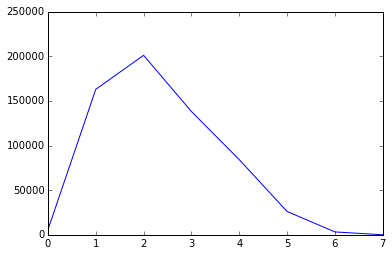

In [31]:
bins = np.arange(10, 99, 10)
plt.plot((df.ageM.groupby(pd.cut(df['ageM'],bins))).agg([count_nonzero]))

print ((df.ageM.groupby(pd.cut(df['ageM'],bins))).agg([count_nonzero]))


,count_nonzero
count,8.000000
mean,23581.500000
std,26121.179874
min,58.000000
25%,1420.250000
50%,15278.500000
75%,40576.750000
max,62145.000000


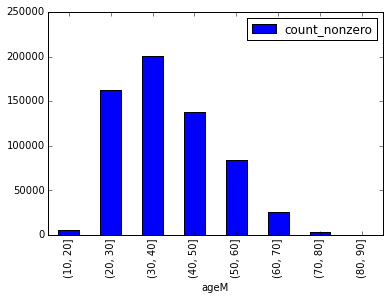

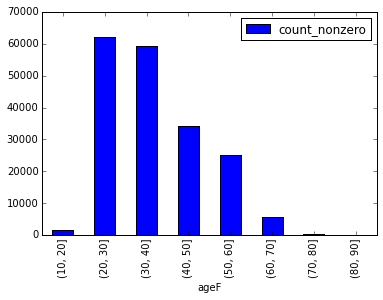

In [63]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')
df_m_c = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero])
df_f_c = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero])

#df_m_c.describe()
#df_f_c.describe()

This tests whether 2 samples are drawn from the same distribution. Note that, like in the case of the one-sample K-S test, the distribution is assumed to be continuous.

This is the two-sided test, one-sided tests are not implemented. The test uses the two-sided asymptotic Kolmogorov-Smirnov distribution.

If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

In [67]:
#scipy.stats.ks_2samp this step is just to see what happens if we apply ks stats on the continous cummilative distribution.
print 'df male aggCum  ' ,df_m_c['count_nonzero']
print 'df female aggCum  ',df_f_c['count_nonzero']
scipy.stats.ks_2samp(df_m_c['count_nonzero'], df_f_c['count_nonzero'])

#print (len(df_m_c['count_nonzero']))
#print (len(df_f_c['count_nonzero']))





df male aggCum   ageM
(10, 20]      5714
(20, 30]    162978
(30, 40]    201044
(40, 50]    138075
(50, 60]     84172
(60, 70]     26125
(70, 80]      3218
(80, 90]        43
Name: count_nonzero, dtype: float64
df female aggCum   ageF
(10, 20]     1741
(20, 30]    62145
(30, 40]    59386
(40, 50]    34307
(50, 60]    25003
(60, 70]     5554
(70, 80]      458
(80, 90]       58
Name: count_nonzero, dtype: float64


(0.5, 0.18768427419801334)

In [37]:
# To get the ks stats value for comparison with ref value 
scipy.stats.ks_2samp(df.ageM, df.ageF)




(0.45996202796586128, 0.0)

In [70]:
# Finding the actual KS value to check from the table

sum1 = n1+n2
mul = n1*n2
ref_val = 1.36*(sqrt(sum1/mul))
#print 'ref value = ' ,value_o
print 'ref_val = ',ref_val
#print ref_val

ref_val =  0.0


##Write the result of ks test in this cell


###Result of KS test
H0 : Both ageM and ageF are derived from the same parent distribution.
The ks value = 0.45 and the reference value is ~0.0 => 
=>  DKS(n1,n2)<c(α)(n1+n2)n1n2
This implies that the null hypothesis is rejected.


In [87]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

#print csM

#print df_m_c
#print np.abs(csM / csM.max()-csF / csF.max())

#pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
#pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
#pl.legend()

bins = np.arange(10, 99, 10)
#plt.plot((df.ageM.groupby(pd.cut(df['ageM'],bins))).agg([count_nonzero]))

print mean((df.ageM.groupby(pd.cut(df['ageM'],bins))).agg([count_nonzero]))
print std((df.ageM.groupby(pd.cut(df['ageM'],bins))).agg([count_nonzero]))
print 'mean ',(mean(bins))



          count_nonzero
ageM                   
(10, 20]           5714
(20, 30]         168692
(30, 40]         369736
(40, 50]         507811
(50, 60]         591983
(60, 70]         618108
(70, 80]         621326
(80, 90]         621369
          count_nonzero
ageM                   
(10, 20]           5714
(20, 30]         162978
(30, 40]         201044
(40, 50]         138075
(50, 60]          84172
(60, 70]          26125
(70, 80]           3218
(80, 90]             43
count_nonzero    77671.125
dtype: float64
count_nonzero    75492.750606
dtype: float64
mean  50.0


##Pearson's test for correlation


In [91]:
print len((df.ageM).fillna(0))
print len((df.ageF).fillna(0))
#scipy.stats.pearsonr((df.ageM).fillna(0), (df.ageF).fillna(0))


scipy.stats.pearsonr((df_m_c).fillna(0), (df_f_c).fillna(0))

#plt.bar ((df.ageM).fillna(0),(df.ageF).fillna(0))

941219
941219


(array([ 0.97668007]), array([  3.11526172e-05]))

###Result: 
H0 : Both ageM and ageF are derived from the same parent distribution.


The age of male and age of female are inversely correlated 

##Spearman's test for correlation

In [90]:
#scipy.stats.spearmanr(df.ageM,df.ageF)
scipy.stats.spearmanr((df_m_c).fillna(0), (df_f_c).fillna(0))

#scipy.stats.spearmanr((df.ageM).fillna(0), (df.ageF).fillna(0))



(0.97619047619047616, 3.3143960262001457e-05)

###Result
H0 : Both ageM and ageF are derived from the same parent distribution.

The age of male and female is inversly corelated.

##DO THE SAME FOR THE DISTRIBUTION OF RIDERS DURING THE DAY VS DURING THE NIGHT!

In [94]:
df = pd.read_csv(os.getenv('PUI2015')+"/201506-citibike-tripdata.csv",parse_dates=['starttime'])



In [95]:
#Adding the columns for the age of bikers in day and in night
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['starttime'].dt.hour <18)]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['starttime'].dt.hour >=18)]
df.ageN.describe()
df.ageD.describe()

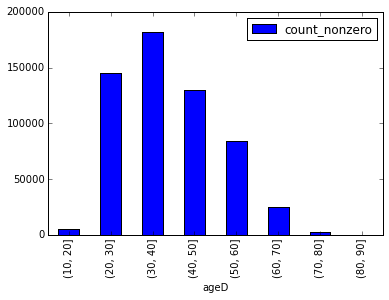

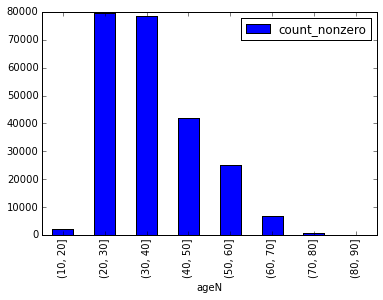

In [115]:
# creatingthe bins for the age and plotting the age day and age night bar plots

bins = np.arange(10, 99, 10)
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')

In [97]:
#Calculating the CDF.

cdfD = df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero])
cdfN = df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero])



          count_nonzero
ageD                   
(10, 20]       0.000805
(20, 30]       0.200326
(30, 40]       0.013163
(40, 50]       0.187981
(50, 60]       0.149054
(60, 70]       0.052900
(70, 80]       0.008308
(80, 90]       0.000139


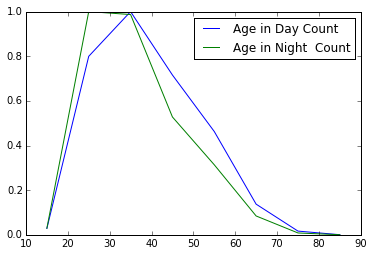

In [98]:
print np.abs(cdfD / cdfD.max()-cdfN / cdfN.max())

pl.plot(bins[:-1] + 5, cdfD / cdfD.max(), label = "Age in Day Count")
pl.plot(bins[:-1] + 5, cdfN / cdfN.max(), label = "Age in Night  Count")
pl.legend()

###KS Test

In [106]:
#print (df['ageD'])
ks=scipy.stats.ks_2samp(df.ageD, df.ageN)
print ks
n1= len(df.ageD)
n2 = len(df.ageN)
## finding the significant value at alpa = 0.05
sum = n1+n2
mul = n1*n2
sig_value = 1.36*sqrt(sum/mul)
print 'sig value = ', sig_value

(0.36215907243691425, 0.0)
sig value =  0.0


##KS Test result
H0 : Both ageM and ageF are derived from the same parent distribution. 

The ks value = 0.36 and the reference value is ~0.0 => => DKS(n1,n2)<c(α)(n1+n2)n1n2 This implies that the null hypothesis is rejected.


###pearsons test


In [107]:
# As both the sample sizes are same so we can calculate the pearsons test in them.
#scipy.stats.pearsonr((df.ageD).fillna(0),(df.ageN).fillna(0))
scipy.stats.pearsonr((cdfD),(cdfN))


(array([ 0.96194828]), array([ 0.00013384]))

H0 : Both ageM and ageF are derived from the same parent distribution. 

The correlation exists between both the sample data


###Spearson Test

In [109]:
scipy.stats.spearmanr(cdfD,cdfN)

(0.97619047619047616, 3.3143960262001457e-05)

H0 : Both ageM and ageF are derived from the same parent distribution. 

The correlation exists between both the sample data